In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def laplacian_naive(G):
    G = np.pad(G, 1, 'constant')
    L = np.empty_like(G)
    for x in range(1, G.shape[0]-1):
        for y in range(1, G.shape[1]-1):
            L[x, y] = G[x+1, y] + G[x-1, y] + G[x, y+1] + G[x, y-1] - 4.0 * G[x, y]
    return L[1:-1, 1:-1]

In [3]:
def plot(U):
    M = 100.0
    plt.clf()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.pcolormesh(U, cmap=plt.cm.jet, vmin=0.0, vmax=M)
    plt.colorbar()
  
    return plt

In [4]:
def set_boundary_conditions(U):
    U[0,2:-2] = 100.0
    U[1:,0] = 50.0
    U[-1, 2:-2] = 100.0

<module 'matplotlib.pyplot' from '/nix/store/cqv5d9b6mxv2s2sxmjfjqdrp7pw2c3sp-python3-3.11.9-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>

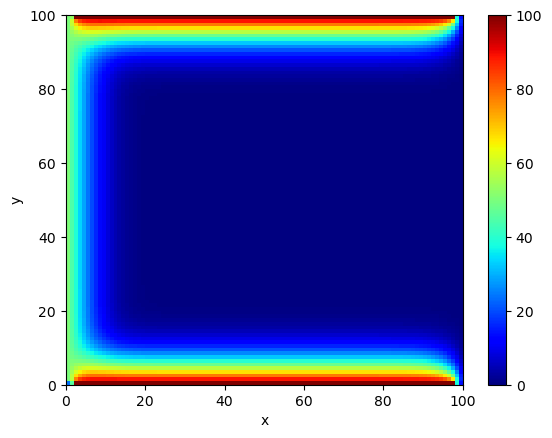

In [5]:
N = 100
dt = 1.0
D = 0.1
steps = 250
U = np.zeros((N, N), dtype=np.float32)
set_boundary_conditions(U)
for _ in range(steps):
    U += dt * D * laplacian_naive(U)
    set_boundary_conditions(U)
plot(U)

In [6]:
def laplacian(G, wrap=False):
    if wrap:
        return np.roll(G, 1, 0) + np.roll(G, -1, 0) + np.roll(G, 1, 1) + np.roll(G, -1, 1) - 4 * G
    G = np.pad(G, 1, 'constant')
    return (np.roll(G, 1, 0) + np.roll(G, -1, 0) + np.roll(G, 1, 1) + np.roll(G, -1, 1) - 4 * G)[1:-1,1:-1]

In [7]:
naiveU = U.copy()

<module 'matplotlib.pyplot' from '/nix/store/cqv5d9b6mxv2s2sxmjfjqdrp7pw2c3sp-python3-3.11.9-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>

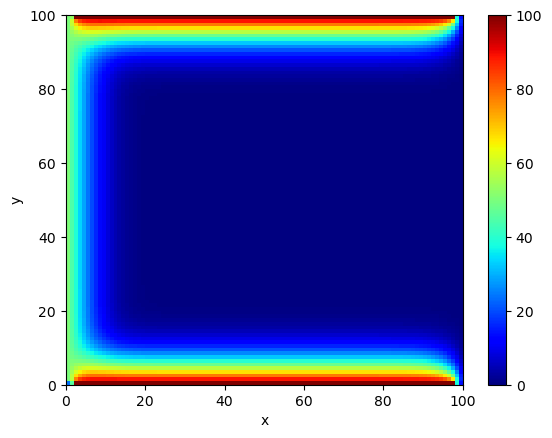

In [8]:
N = 100
dt = 1.0
D = 0.1
steps = 250
U = np.zeros((N, N), dtype=np.float32)
set_boundary_conditions(U)
for _ in range(steps):
    U += dt * D * laplacian(U)
    set_boundary_conditions(U)
plot(U)

In [9]:
e = np.abs(U - naiveU)
np.linalg.norm(e)

0.00012650149